<a href="https://colab.research.google.com/github/harisfad/ArcSDM/blob/master/Dicoding_Latihan%20SKLearn%20K-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
data = pd.read_csv('Mall_Customers.csv')

In [33]:
df = pd.read_csv('Mall_Customers.csv')

In [34]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [35]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
df['gender'].replace(['Female', 'Male'],[0,1],inplace=True)

In [36]:
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [37]:
from sklearn.cluster import KMeans
x = df.drop(['CustomerID','gender'], axis=1)


In [38]:
cluster = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(x)
  cluster.append(km.inertia_)

Text(0, 0.5, 'Inertia')

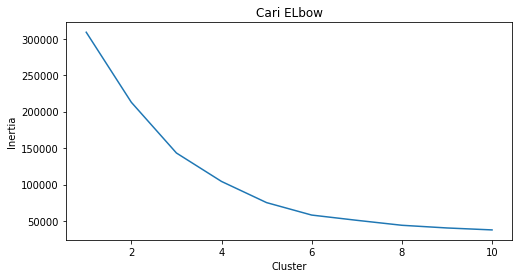

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=cluster, ax=ax)
ax.set_title('Cari ELbow')
ax.set_xlabel('Cluster')
ax.set_ylabel('Inertia')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


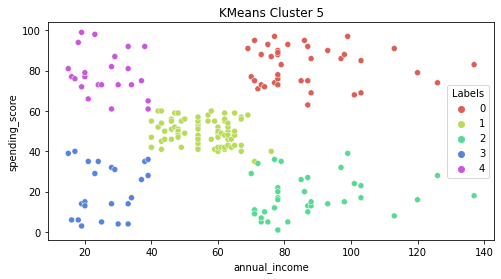

In [50]:
km5= KMeans(n_clusters=5).fit(x)
x['Labels'] = km5.labels_
plt.figure(figsize=(8,4))
sns.scatterplot(x['annual_income'],x['spending_score'], hue=x['Labels'],
                palette=sns.color_palette('hls',5) )
plt.title('KMeans Cluster 5')
plt.show()